

Source: https://www.kaggle.com/datasets/hm-land-registry/uk-housing-prices-paid

Transaction unique identifier: transaction reference number.
Price Sale price: as stated on the transfer deed.
Date of Transfer Date: when the sale was completed, as stated on the transfer deed.
Property Type: D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
Old/New Indicates the age of the property and applies to all price paid transactions, residential and non-residential.
Y = a newly built property, N = an established residential building
Duration Relates to the tenure: F = Freehold, L= Leasehold etc.

PPD Category Type Indicates the type of Price Paid transaction.
A = Standard Price Paid entry, includes single residential property sold for full market value.
B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage) and transfers to non-private individuals. Note that category B does not separately identify the transaction types stated. HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.

Record Status - monthly file only Indicates additions, changes and deletions to the records.(see guide below).
A = Addition
C = Change
D = Delete.

Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.

This data was kindly released by HM Land Registry under the Open Government License 3.0.

Data produced by HM Land Registry © Crown copyright 2017.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Tutorials\House Price Predictions\House Price Data Projects\UK Land Registry Transactions.csv")

In [3]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


Comverting the codes to their full names
D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other

Counting the of counties represented in the data.

In [4]:
df['County'].value_counts()

County
GREATER LONDON        2993422
GREATER MANCHESTER     985772
WEST MIDLANDS          856803
WEST YORKSHIRE         849862
KENT                   636515
                       ...   
WEST GLAMORGAN           2048
GWENT                    1897
SOUTH GLAMORGAN          1775
CLEVELAND                1766
ISLES OF SCILLY           473
Name: count, Length: 127, dtype: int64

Mapping the Property types to display to full names. this is required for encoding the data. Using a dictionary to map the values.

In [5]:
pt_map = {'D': 'Detached',
          'S': 'Semi-Detached',
          'T': 'Terraced',
          'F': 'Flats',
          'O': 'Other'}

df['Property Type']=df['Property Type'].map(pt_map)

In [6]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,Terraced,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,Semi-Detached,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,Terraced,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,Terraced,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,Semi-Detached,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


Counting the number of transactions (new/old) in the data.

In [7]:
df['Old/New'].value_counts()

Old/New
N    20192676
Y     2296672
Name: count, dtype: int64

Mapping the N and O values to their full names. this is required for encoding the data. Using a dictionary to map the values.

In [8]:
oldnew_map = {'N': 'New',
              'O': 'Old'}

df['Old/New']=df['Old/New'].map(oldnew_map)

In [9]:
df['Duration'].value_counts()

Duration
F    17176410
L     5312258
U         680
Name: count, dtype: int64

Mapping duration values to their full names. this is required for encoding the data. Using a dictionary to map the values.

In [10]:
duration_map = {'F': 'Freehold',
                'L': 'Leasehold',
                'U': 'Commonhold'}

df['Duration']=df['Duration'].map(duration_map)

In [11]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,Terraced,New,Freehold,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,Semi-Detached,New,Freehold,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,Terraced,New,Freehold,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,Terraced,New,Freehold,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,Semi-Detached,New,Freehold,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


Dropping the columns that are not required for the analysis.

In [12]:
df=df.drop(columns=['PPDCategory Type', 'Record Status - monthly file only'])

In [13]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,Terraced,New,Freehold,OLDHAM,OLDHAM,GREATER MANCHESTER
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,Semi-Detached,New,Freehold,GRAYS,THURROCK,THURROCK
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,Terraced,New,Freehold,HIGHBRIDGE,SEDGEMOOR,SOMERSET
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,Terraced,New,Freehold,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,Semi-Detached,New,Freehold,WAKEFIELD,LEEDS,WEST YORKSHIRE


Need to use LabelEncoder to encode the data.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df['County'].value_counts()

County
GREATER LONDON        2993422
GREATER MANCHESTER     985772
WEST MIDLANDS          856803
WEST YORKSHIRE         849862
KENT                   636515
                       ...   
WEST GLAMORGAN           2048
GWENT                    1897
SOUTH GLAMORGAN          1775
CLEVELAND                1766
ISLES OF SCILLY           473
Name: count, Length: 127, dtype: int64

In [15]:
labelencoder = LabelEncoder()
df['County']=(labelencoder.fit_transform(df['County']))

Mapping each county to the encoded number for the county.

In [18]:
county_class_map = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

In [19]:
county_class_map

{'AVON': 0,
 'BATH AND NORTH EAST SOMERSET': 1,
 'BEDFORD': 2,
 'BEDFORDSHIRE': 3,
 'BERKSHIRE': 4,
 'BLACKBURN WITH DARWEN': 5,
 'BLACKPOOL': 6,
 'BLAENAU GWENT': 7,
 'BOURNEMOUTH': 8,
 'BRACKNELL FOREST': 9,
 'BRIDGEND': 10,
 'BRIGHTON AND HOVE': 11,
 'BUCKINGHAMSHIRE': 12,
 'CAERPHILLY': 13,
 'CAMBRIDGESHIRE': 14,
 'CARDIFF': 15,
 'CARMARTHENSHIRE': 16,
 'CENTRAL BEDFORDSHIRE': 17,
 'CEREDIGION': 18,
 'CHESHIRE': 19,
 'CHESHIRE EAST': 20,
 'CHESHIRE WEST AND CHESTER': 21,
 'CITY OF BRISTOL': 22,
 'CITY OF DERBY': 23,
 'CITY OF KINGSTON UPON HULL': 24,
 'CITY OF NOTTINGHAM': 25,
 'CITY OF PETERBOROUGH': 26,
 'CITY OF PLYMOUTH': 27,
 'CLEVELAND': 28,
 'CLWYD': 29,
 'CONWY': 30,
 'CORNWALL': 31,
 'COUNTY DURHAM': 32,
 'CUMBRIA': 33,
 'DARLINGTON': 34,
 'DENBIGHSHIRE': 35,
 'DERBYSHIRE': 36,
 'DEVON': 37,
 'DORSET': 38,
 'DURHAM': 39,
 'DYFED': 40,
 'EAST RIDING OF YORKSHIRE': 41,
 'EAST SUSSEX': 42,
 'ESSEX': 43,
 'FLINTSHIRE': 44,
 'GLOUCESTERSHIRE': 45,
 'GREATER LONDON': 46,
 'GREAT

In [20]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,Terraced,New,Freehold,OLDHAM,OLDHAM,47
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,Semi-Detached,New,Freehold,GRAYS,THURROCK,109
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,Terraced,New,Freehold,HIGHBRIDGE,SEDGEMOOR,94
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,Terraced,New,Freehold,BEDFORD,NORTH BEDFORDSHIRE,3
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,Semi-Detached,New,Freehold,WAKEFIELD,LEEDS,119


Dropping the columns that are not required for the analysis.

In [21]:
df=df.drop(columns=['Town/City',	'District'])

In [22]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,County
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,Terraced,New,Freehold,47
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,Semi-Detached,New,Freehold,109
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,Terraced,New,Freehold,94
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,Terraced,New,Freehold,3
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,Semi-Detached,New,Freehold,119


Converting the date of transfer column to datetime.

In [23]:
df['Date of Transfer']=pd.to_datetime(df['Date of Transfer'])

Extracting the month and year from the date of transfer column.

In [24]:
df['Month']=df['Date of Transfer'].dt.month

In [25]:
df['Year']=df['Date of Transfer'].dt.year

In [26]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,County,Month,Year
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18,Terraced,New,Freehold,47,8,1995
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09,Semi-Detached,New,Freehold,109,8,1995
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30,Terraced,New,Freehold,94,6,1995
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24,Terraced,New,Freehold,3,11,1995
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23,Semi-Detached,New,Freehold,119,6,1995


In [27]:
df['Property Type'].value_counts()

Property Type
Terraced         6918811
Semi-Detached    6216218
Detached         5170327
Flats            4083424
Other             100568
Name: count, dtype: int64

Encoding the data of 'Property Type',	'Old/New',	'Duration' columns.

In [30]:
df = df.join(pd.get_dummies(df[['Property Type',	'Old/New',	'Duration']]))

In [31]:
df = df.drop(columns=['Property Type',	'Old/New',	'Duration'])

In [39]:
df= df.drop(columns=['Transaction unique identifier','Date of Transfer'])

In [40]:
df.head()

,Price,County,Month,Year,Property Type_Detached,Property Type_Flats,Property Type_Other,Property Type_Semi-Detached,Property Type_Terraced,Old/New_New,Duration_Commonhold,Duration_Freehold,Duration_Leasehold
0,25000,47,8,1995,False,False,False,False,True,True,False,True,False
1,42500,109,8,1995,False,False,False,True,False,True,False,True,False
2,45000,94,6,1995,False,False,False,False,True,True,False,True,False
3,43150,3,11,1995,False,False,False,False,True,True,False,True,False
4,18899,119,6,1995,False,False,False,True,False,True,False,True,False


In [51]:
df.corr()

,Price,County,Month,Year,Property Type_Detached,Property Type_Flats,Property Type_Other,Property Type_Semi-Detached,Property Type_Terraced,Old/New_New,Duration_Commonhold,Duration_Freehold,Duration_Leasehold
Price,1.000000,-0.038160,0.003807,0.191674,0.100570,-0.003935,0.191867,-0.046353,-0.071225,-0.006450,-0.000159,0.018528,-0.018527
County,-0.038160,1.000000,0.003400,0.002522,0.026202,-0.090174,-0.000906,0.055135,-0.001865,-0.010122,-0.000899,0.086132,-0.086124
Month,0.003807,0.003400,1.000000,-0.035566,0.013464,-0.005286,-0.002680,0.001329,-0.008760,-0.015344,0.000537,0.004792,-0.004799
Year,0.191674,0.002522,-0.035566,1.000000,-0.011925,0.044165,0.111626,-0.023878,-0.019017,0.015880,-0.002692,-0.036369,0.036406
Property Type_Detached,0.100570,0.026202,0.013464,-0.011925,1.000000,-0.257354,-0.036619,-0.337695,-0.364218,-0.084522,0.000474,0.254415,-0.254433
Property Type_Flats,-0.003935,-0.090174,-0.005286,0.044165,-0.257354,1.000000,-0.031568,-0.291113,-0.313977,-0.123345,0.000452,-0.817909,0.817940
Property Type_Other,0.191867,-0.000906,-0.002680,0.111626,-0.036619,-0.031568,1.000000,-0.041423,-0.044676,0.010058,-0.000369,-0.003299,0.003304
Property Type_Semi-Detached,-0.046353,0.055135,0.001329,-0.023878,-0.337695,-0.291113,-0.041423,1.000000,-0.411995,0.083391,0.000091,0.234463,-0.234475
Property Type_Terraced,-0.071225,-0.001865,-0.008760,-0.019017,-0.364218,-0.313977,-0.044676,-0.411995,1.000000,0.097824,-0.000845,0.224497,-0.224496
Old/New_New,-0.006450,-0.010122,-0.015344,0.015880,-0.084522,-0.123345,0.010058,0.083391,0.097824,1.000000,-0.003353,0.110564,-0.110526


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'County'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

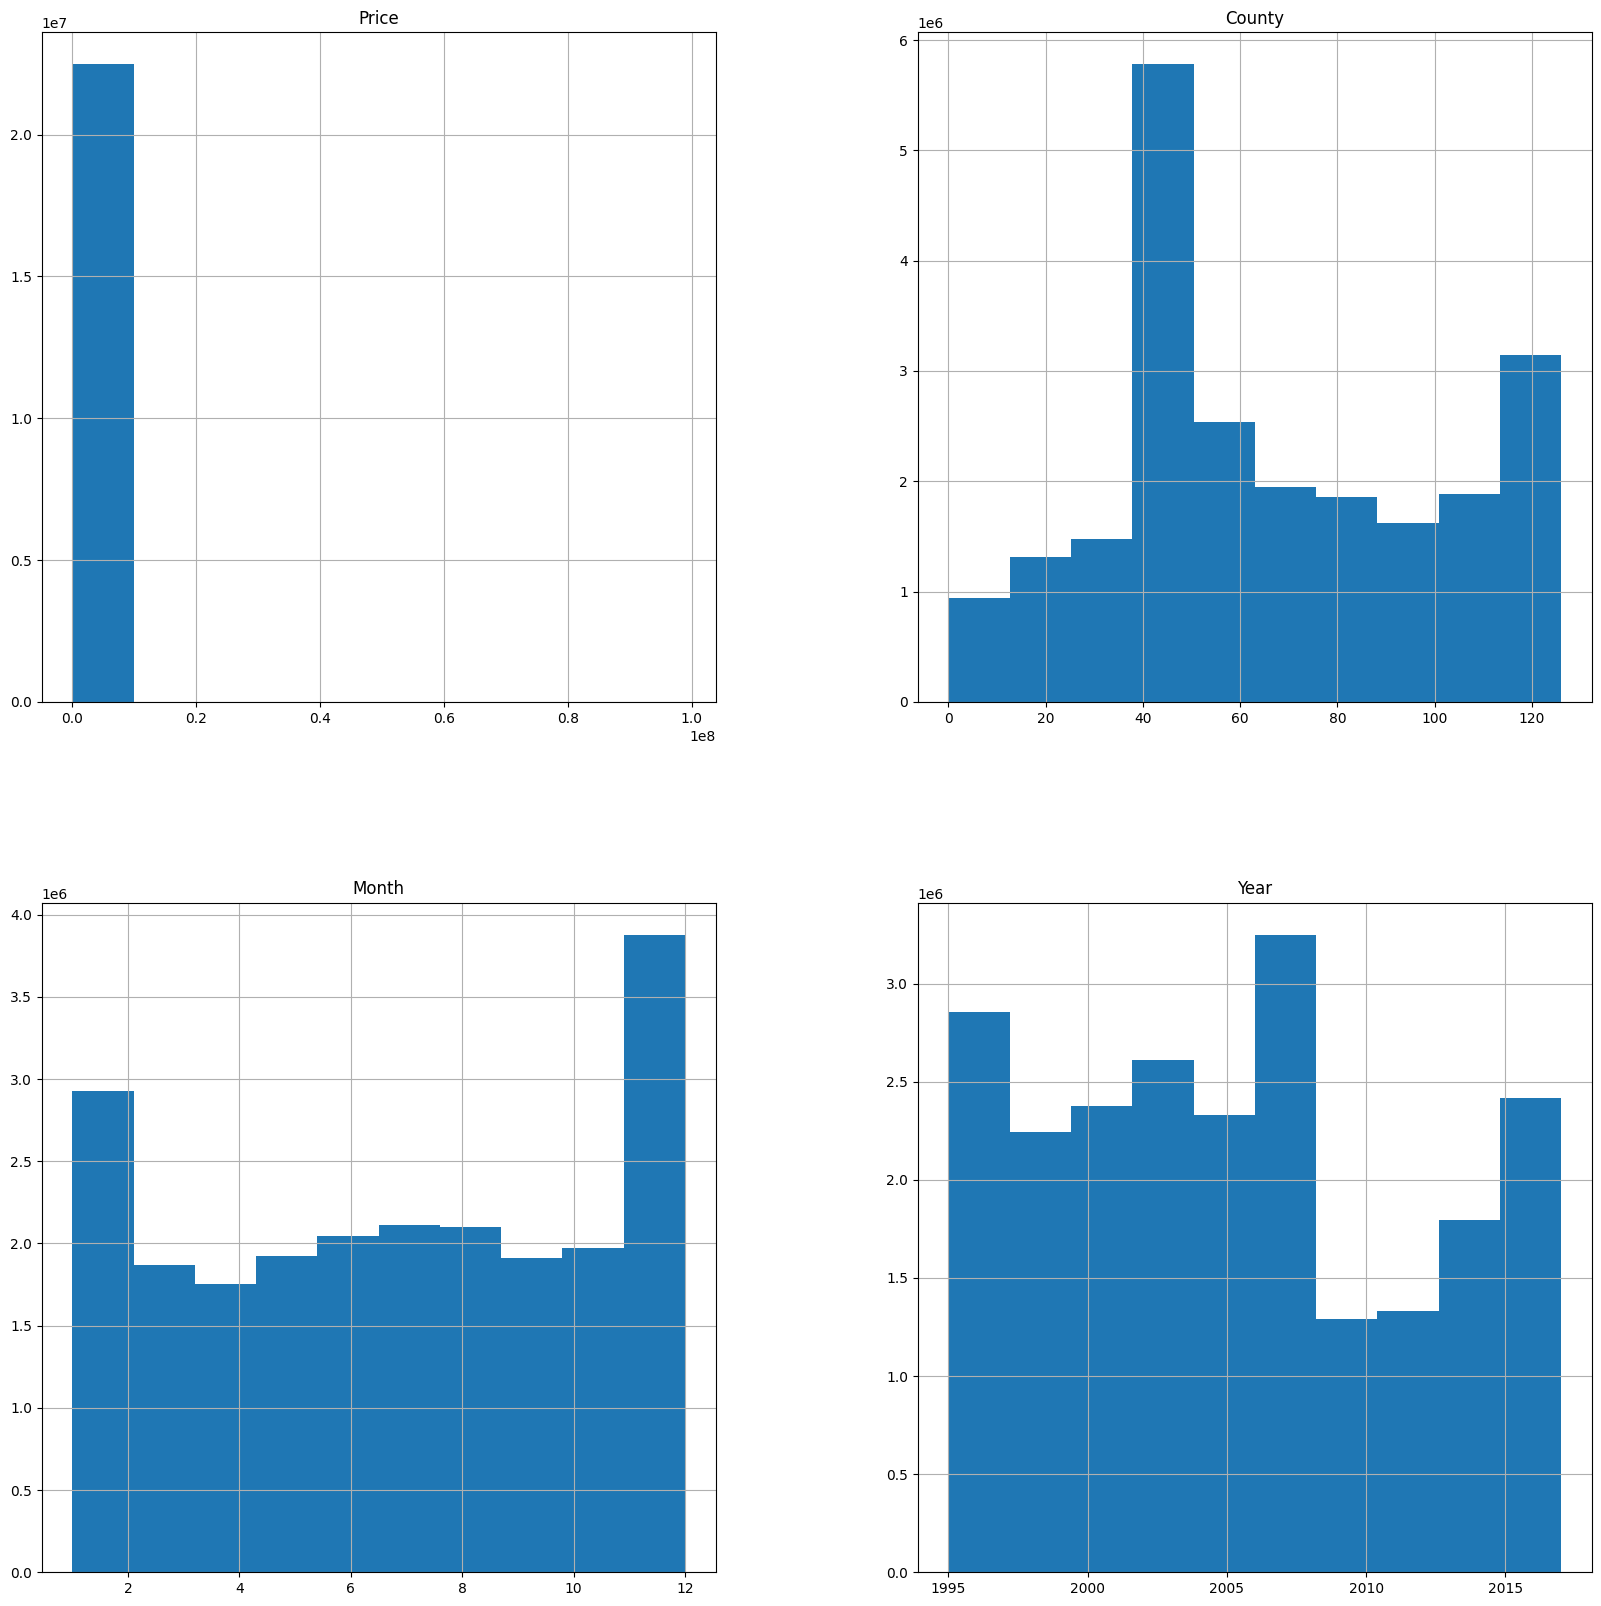

In [52]:
df.hist(figsize=(20,20))

In [55]:
import matplotlib.pyplot as plt

<Axes: >

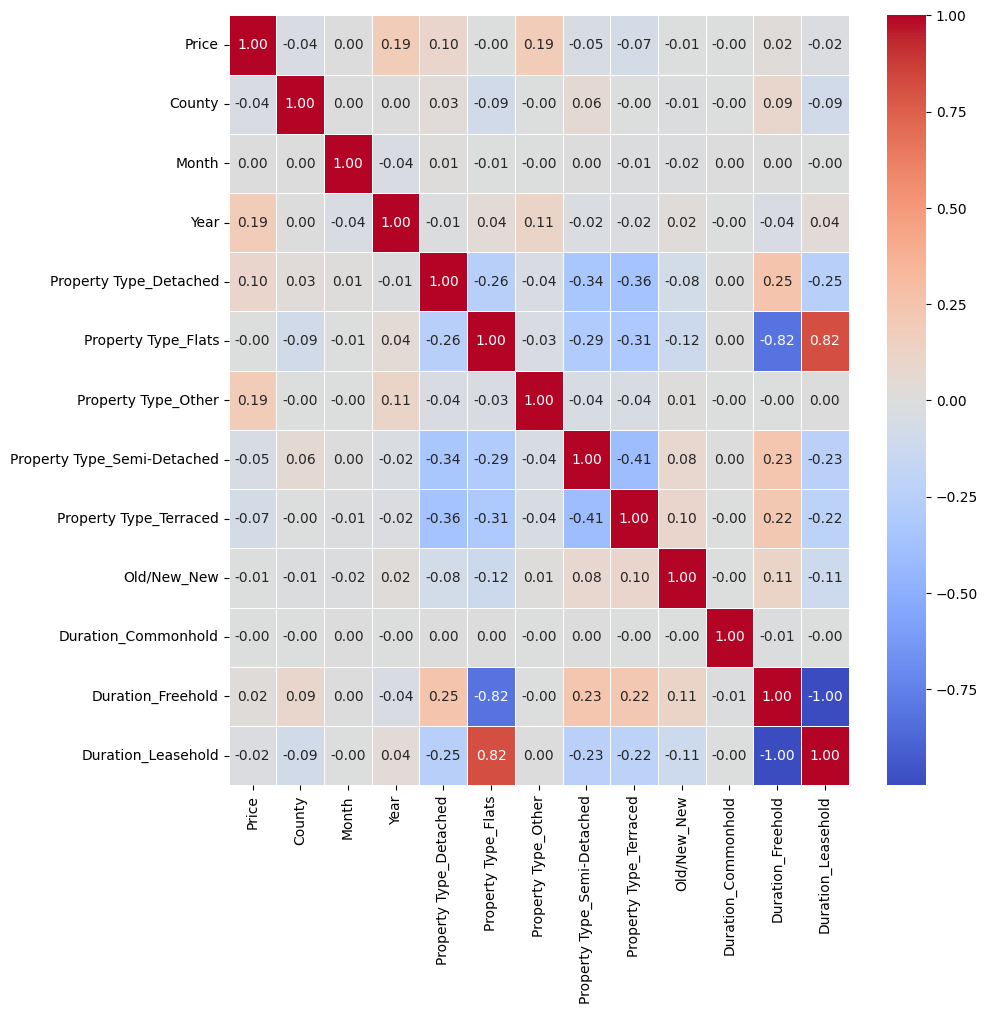

In [56]:
corr = df.corr()
plt.figure(figsize=(10,10))
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [41]:
X = df.drop(columns=['Price'])
y = df['Price']

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error

In [47]:
r2_score(y_test, y_pred)

0.0812848856414593

In [50]:
mean_squared_error(y_test, y_pred)

138667764952.76926